# Biomass concentration Analysis

# Interactive Plotting
## Trend Analysis: Parameter of Interest vs. Time

In [1]:
import pandas as pd
import os
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Load all batches into a single DataFrame
all_batches = []
for i in range(31, 61):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch ID'] = i
    # Drop rows with missing values in the specified column
    df.dropna(subset=['Offline Biomass concentratio(X_offline:X(g L^{-1}))'], inplace=True)
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Calculate statistical information for each batch
stats = []
for i in range(31, 61):
    df = all_batches_df[all_batches_df['Batch ID'] == i]
    mean_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].mean()
    median_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].median()
    std_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].std()
    min_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].min()
    max_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].max()
    mode_1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].quantile(0.25)
    Q3 = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].quantile(0.75)
    IQR = Q3 - Q1

    stats.append({
        'Batch': i,
        'Mean': mean_1,
        'Median': median_1,
        'Mode': mode_1_value,
        'Std Dev': std_1,
        'Min': min_1,
        'Max': max_1,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })
stats_df = pd.DataFrame(stats)

# Merge stats with the main DataFrame for hover info
all_batches_df = all_batches_df.merge(stats_df, left_on='Batch ID', right_on='Batch')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Biomass Concentration Analysis", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[1],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Graph(id='line-plot', style={'height': '60vh'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(31, 61)]
    return [1]

@app.callback(
    Output('line-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_line_plot(selected_batches):
    filtered_df = all_batches_df[all_batches_df['Batch ID'].isin(selected_batches)]
    fig = px.line(filtered_df, x='Time (h)', y='Offline Biomass concentratio(X_offline:X(g L^{-1}))', color='Batch ID',
                  title='Biomass Concentration Over Time',
                  hover_data={
                      'Mean': True, 'Median': True, 'Mode': True,
                      'Std Dev': True, 'Min': True, 'Max': True,
                      'Q1': True, 'Q3': True, 'IQR': True
                  })

    fig.update_layout(
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Statistical Analysis & Distribution Plotting (Static) for Each Batch "Separately" 
### Batches 31-60: Controlled by Operators

In [2]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Initialize an empty list to store DataFrames for each batch
batch_dfs = []

# Iterate over batch numbers
for i in range(31, 61):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    
    # Calculate statistical values of the "Parameter of Interest" column
    mean_1 = df[par].mean()
    median_1 = df[par].median()
    std_1 = df[par].std()
    min_1 = df[par].min()
    max_1 = df[par].max()
    mode_1 = df[par].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1

    # Create a DataFrame with statistical values for the current batch
    batch_summary_df = pd.DataFrame({
        'Batch': [i], 
        f'Mean_{par}': [mean_1], 
        f'Median_{par}': [median_1], 
        f'Mode_{par}': [mode_1_value], 
        f'Std_{par}': [std_1], 
        f'Min_{par}': [min_1], 
        f'Max_{par}': [max_1], 
        f'Q1_{par}': [Q1], 
        f'Q3_{par}': [Q3], 
        f'IQR_{par}': [IQR]
    })

    # Append the DataFrame to the list
    batch_dfs.append(batch_summary_df)

# Concatenate all DataFrames in the list into a single DataFrame
stats_1 = pd.concat(batch_dfs, ignore_index=True)

# Display the summary DataFrame
stats_1


,Batch,Mean_Offline Biomass concentratio(X_offline:X(g L^{-1})),Median_Offline Biomass concentratio(X_offline:X(g L^{-1})),Mode_Offline Biomass concentratio(X_offline:X(g L^{-1})),Std_Offline Biomass concentratio(X_offline:X(g L^{-1})),Min_Offline Biomass concentratio(X_offline:X(g L^{-1})),Max_Offline Biomass concentratio(X_offline:X(g L^{-1})),Q1_Offline Biomass concentratio(X_offline:X(g L^{-1})),Q3_Offline Biomass concentratio(X_offline:X(g L^{-1})),IQR_Offline Biomass concentratio(X_offline:X(g L^{-1}))
0,31,19.760377,22.8460,0.45789,7.440857,0.45789,25.776,17.97000,24.57675,6.60675
1,32,20.560570,24.9550,0.45906,7.699678,0.45906,25.908,19.24800,25.24600,5.99800
2,33,17.525294,18.8810,0.52766,6.246570,0.52766,23.708,15.88900,21.85850,5.96950
3,34,19.319610,21.2310,0.48441,7.229063,0.48441,26.428,18.03100,23.90400,5.87300
4,35,19.276325,23.3000,0.46355,7.710071,0.46355,25.165,17.44475,24.52850,7.08375
5,36,17.706276,19.7690,0.48289,6.470497,0.48289,23.603,17.55400,22.02700,4.47300
6,37,19.454831,22.5750,0.49568,7.584936,0.49568,25.734,17.91300,24.53800,6.62500
7,38,19.231846,21.7940,0.41546,7.185464,0.41546,24.931,18.55400,23.81000,5.25600
8,39,17.589205,20.6490,0.52791,6.318753,0.52791,22.544,17.04800,21.23800,4.19000
9,40,18.804495,20.8540,0.47450,7.143988,0.47450,25.429,17.94300,23.56300,5.62000


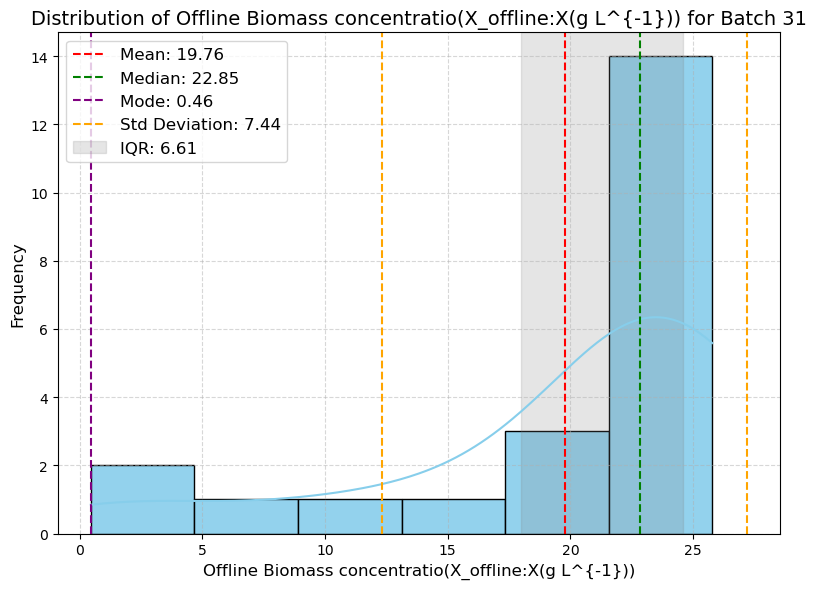

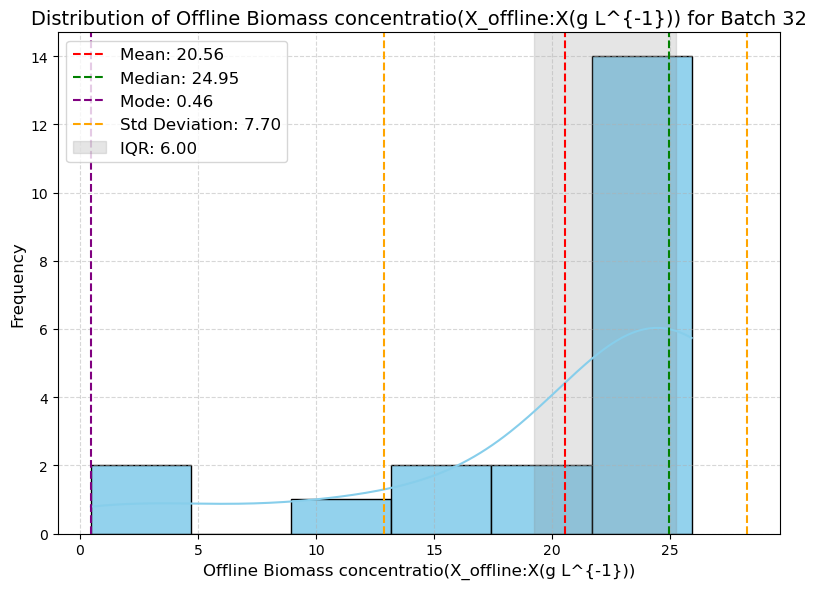

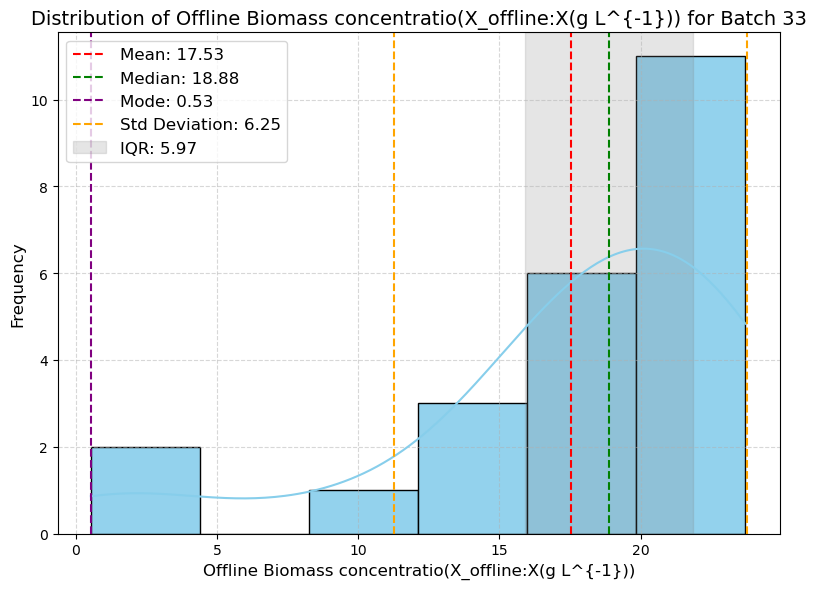

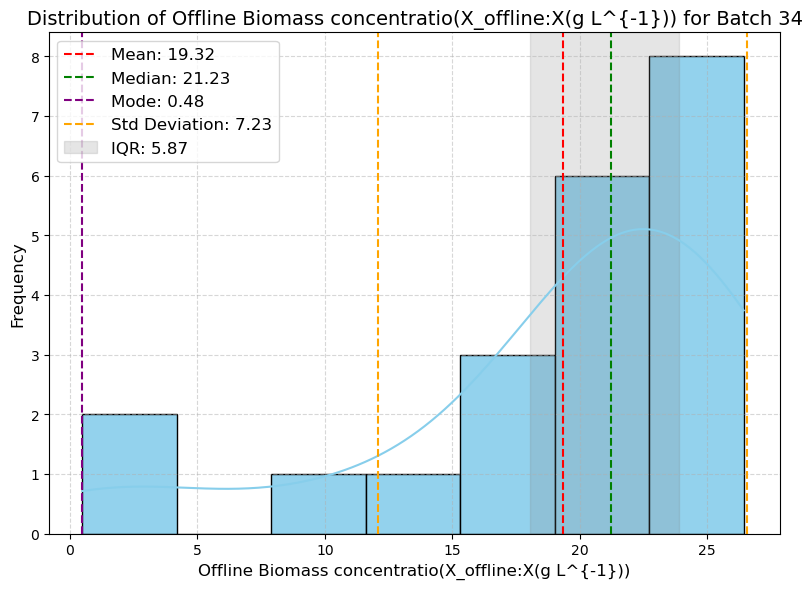

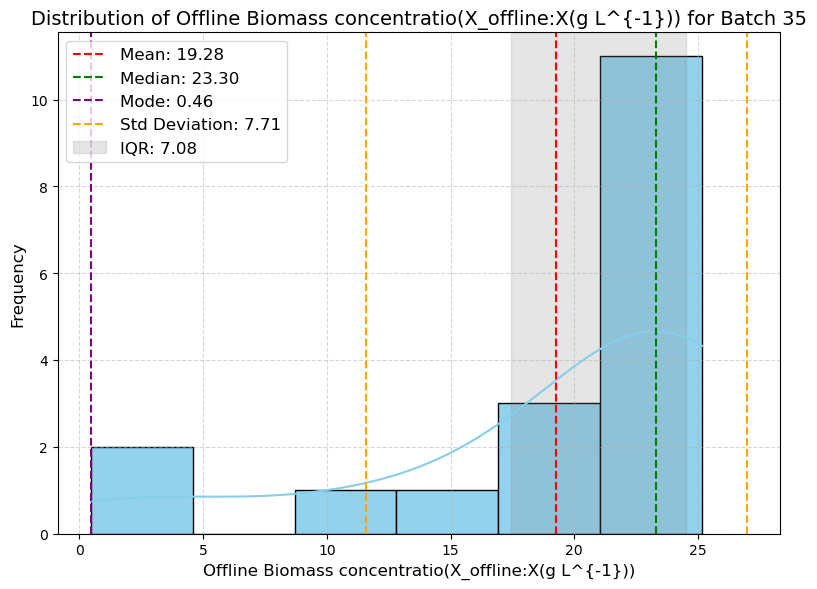

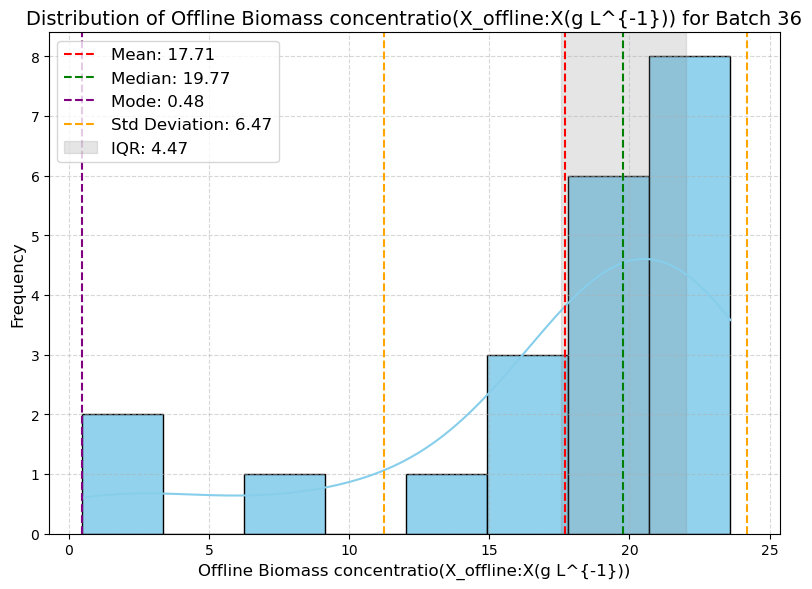

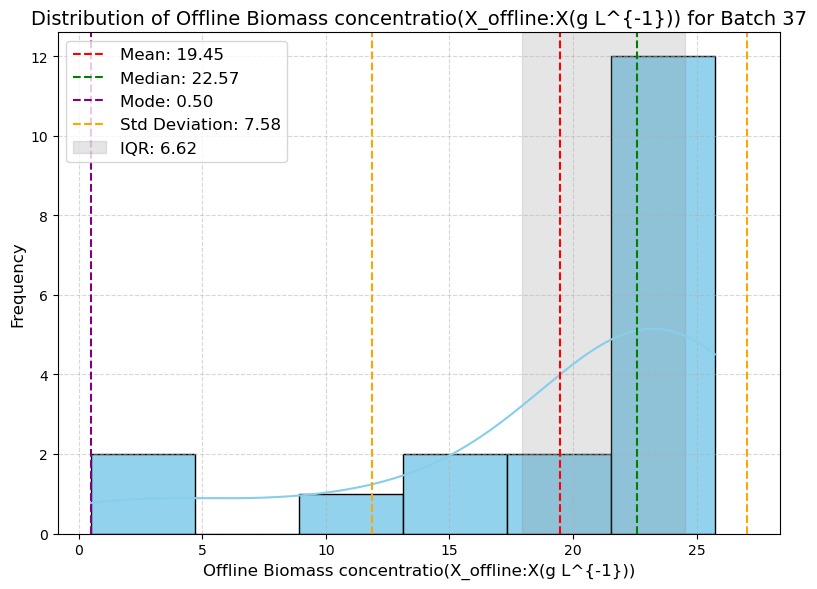

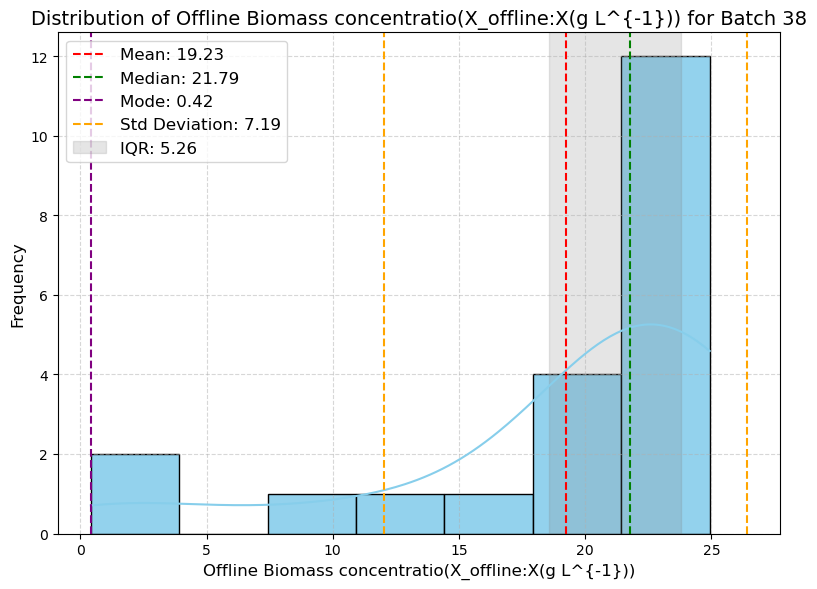

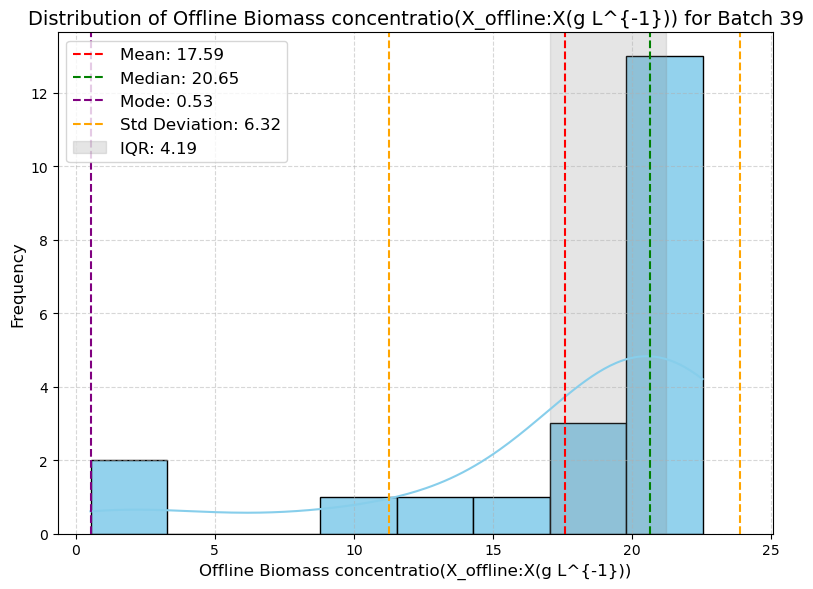

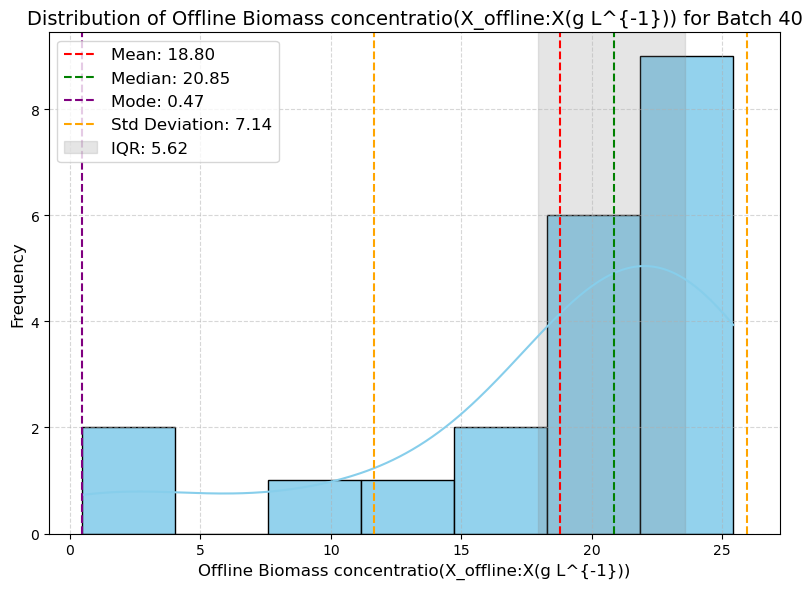

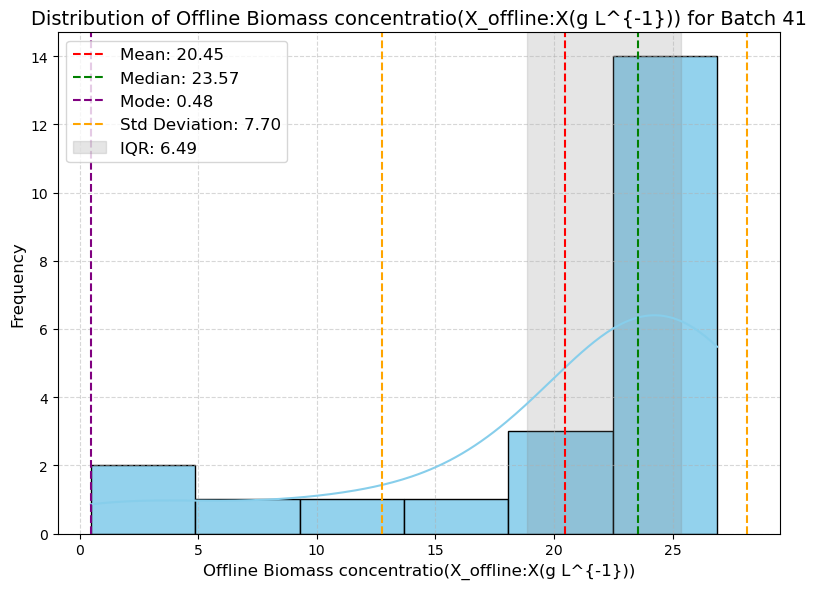

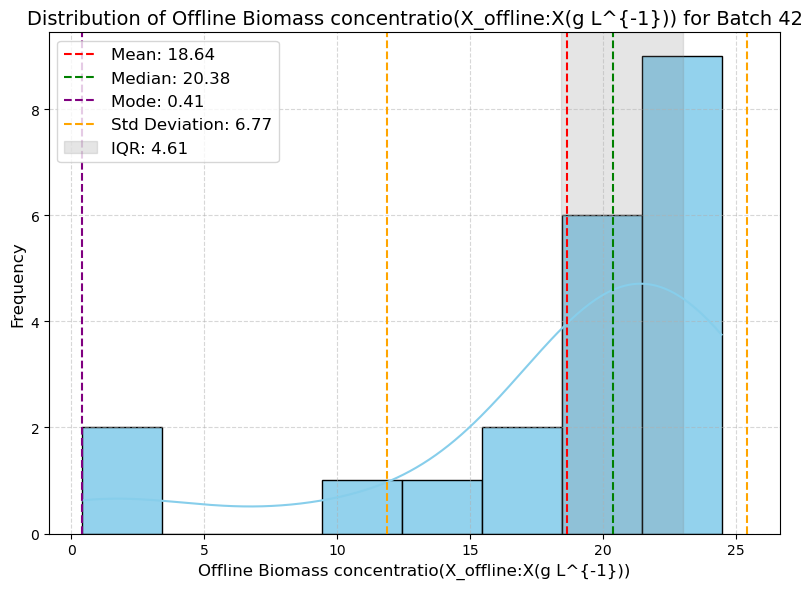

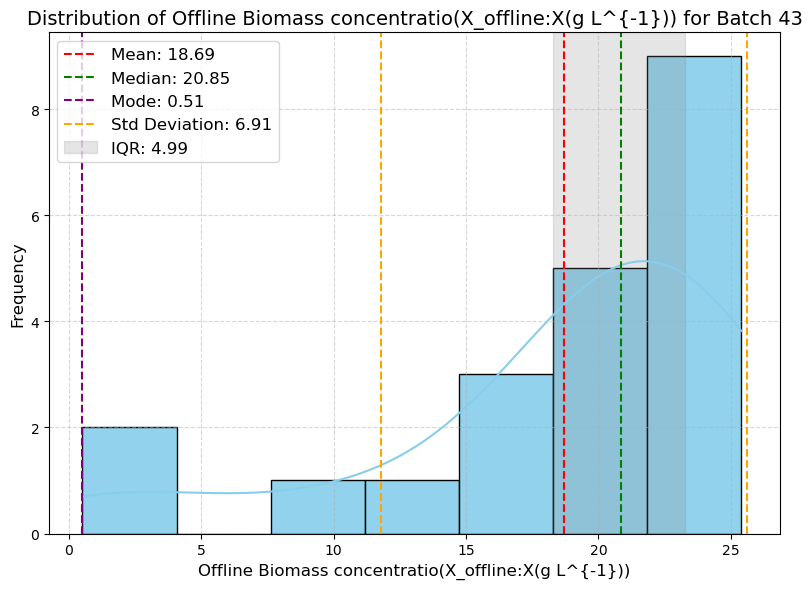

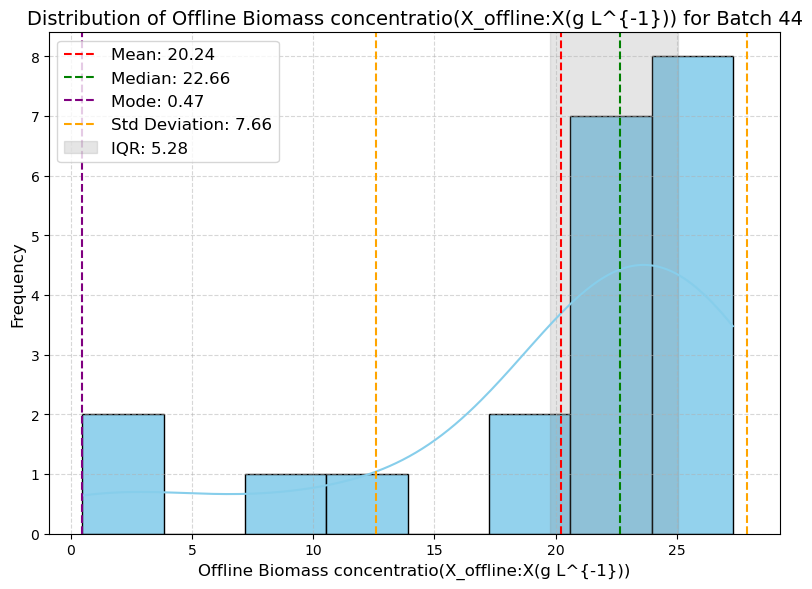

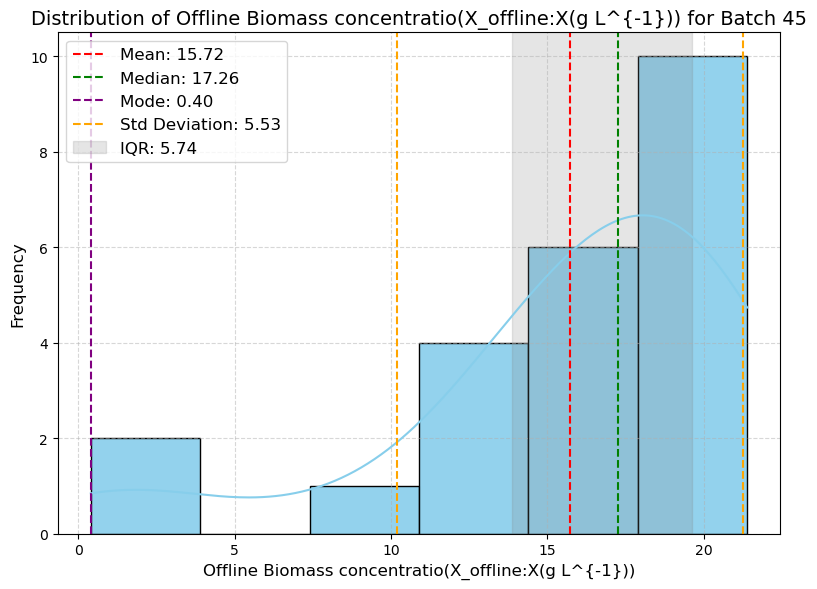

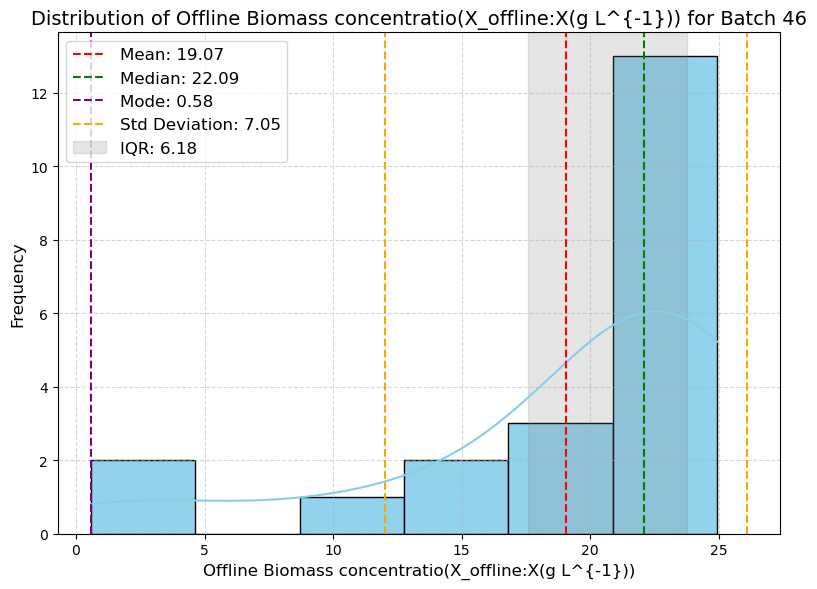

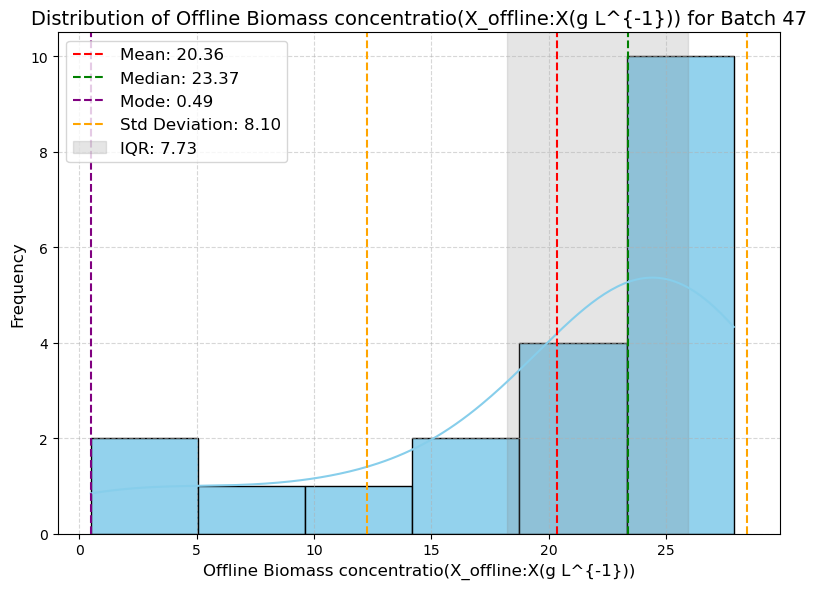

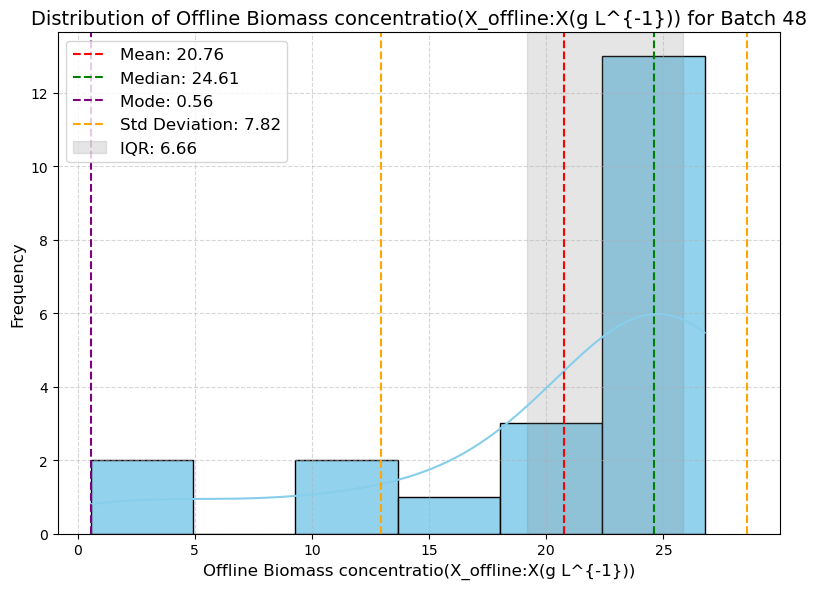

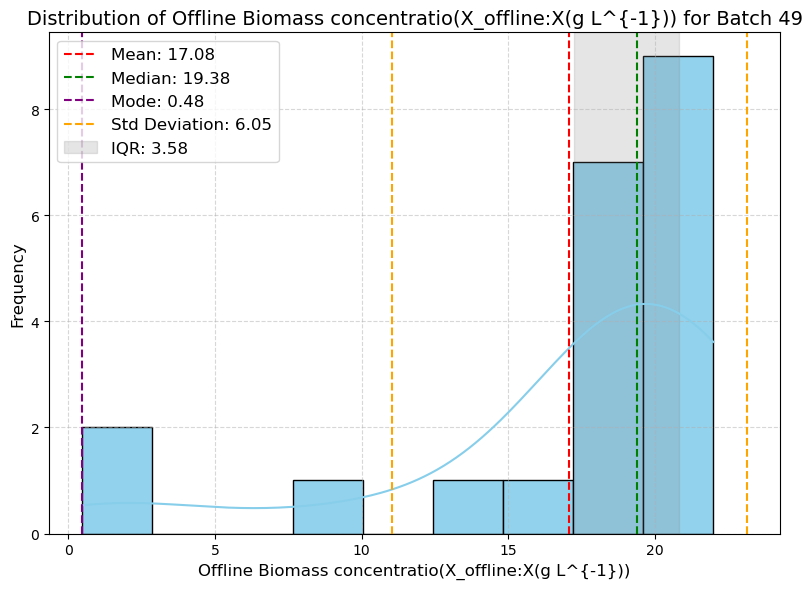

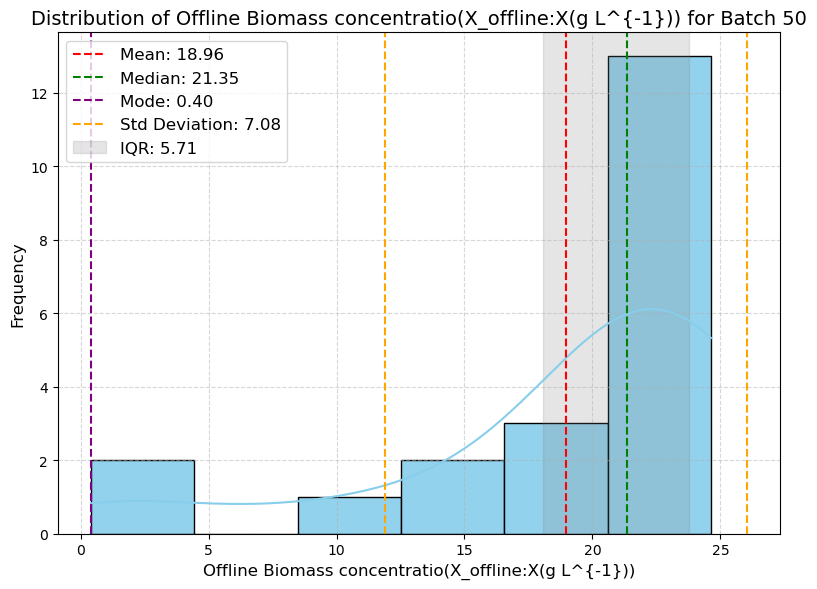

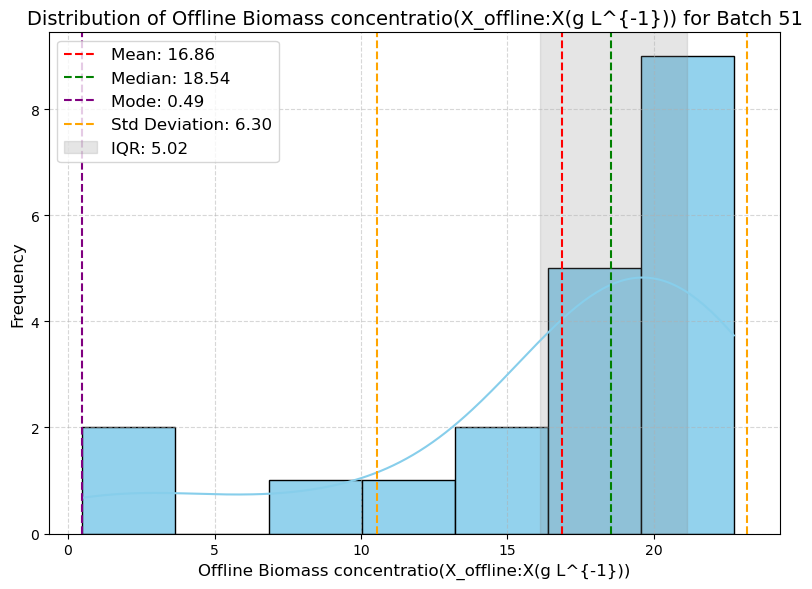

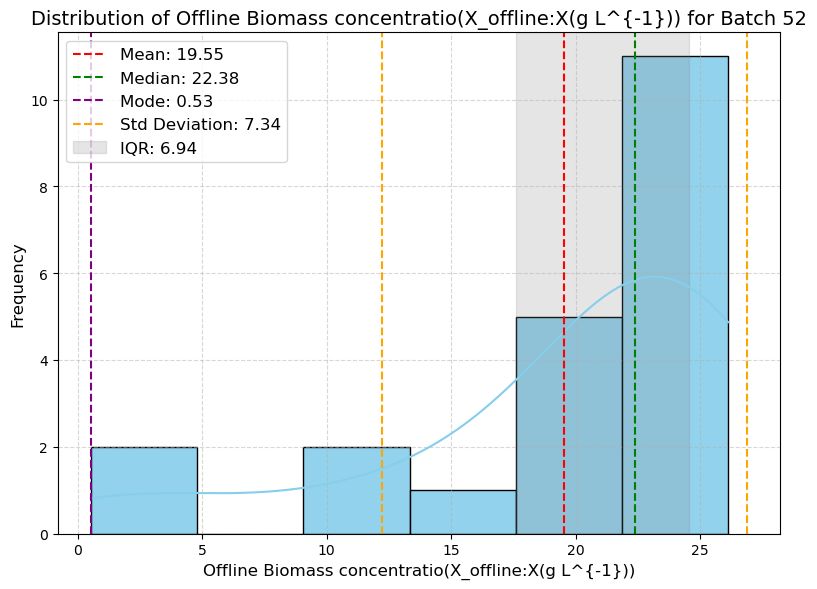

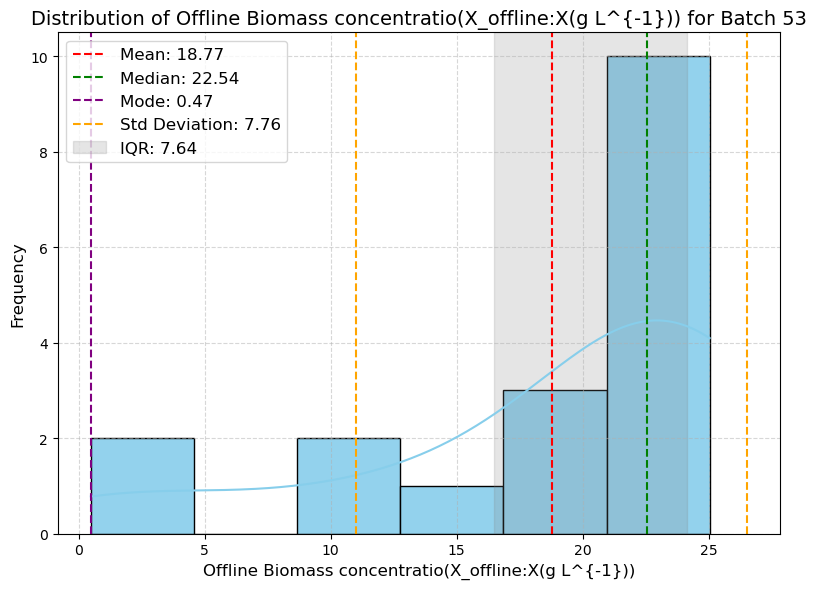

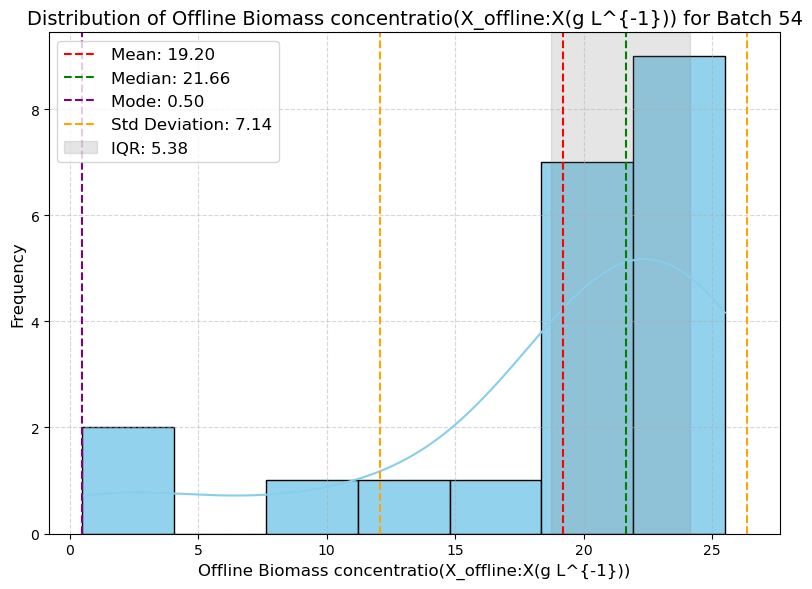

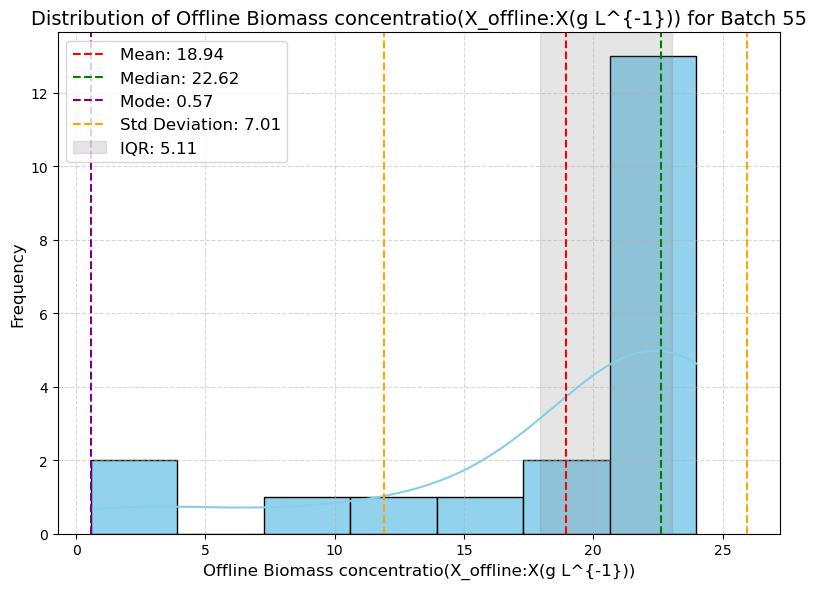

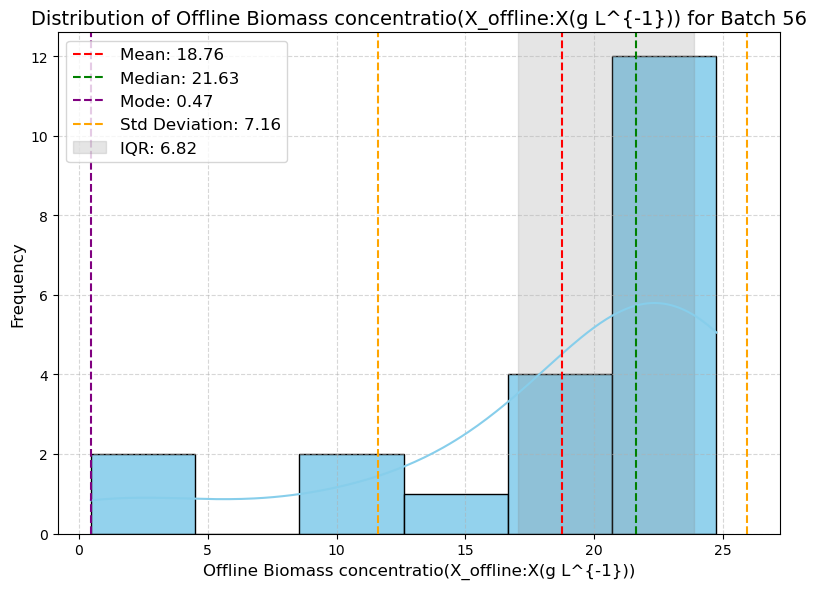

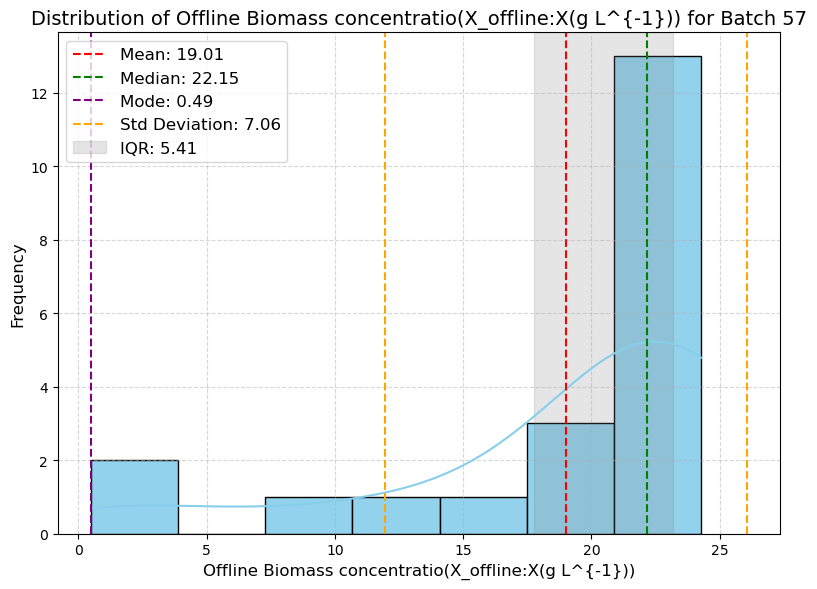

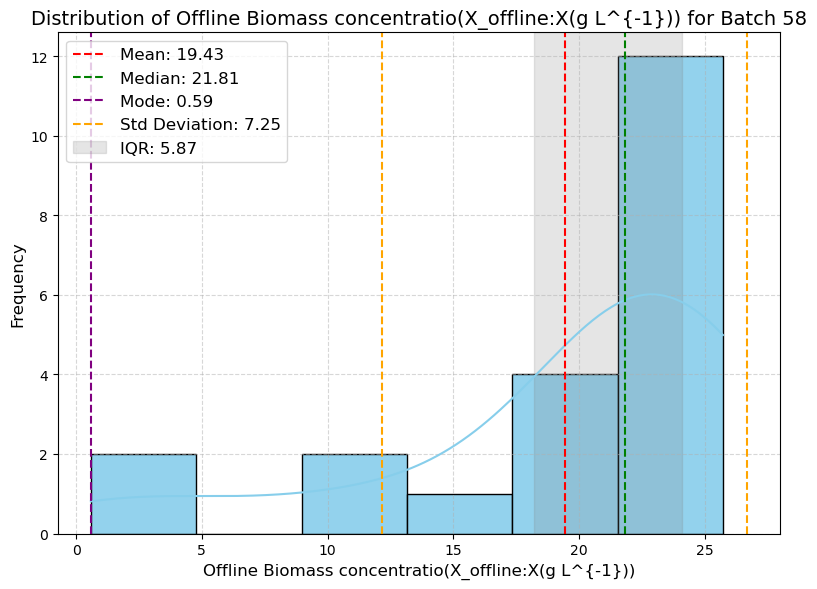

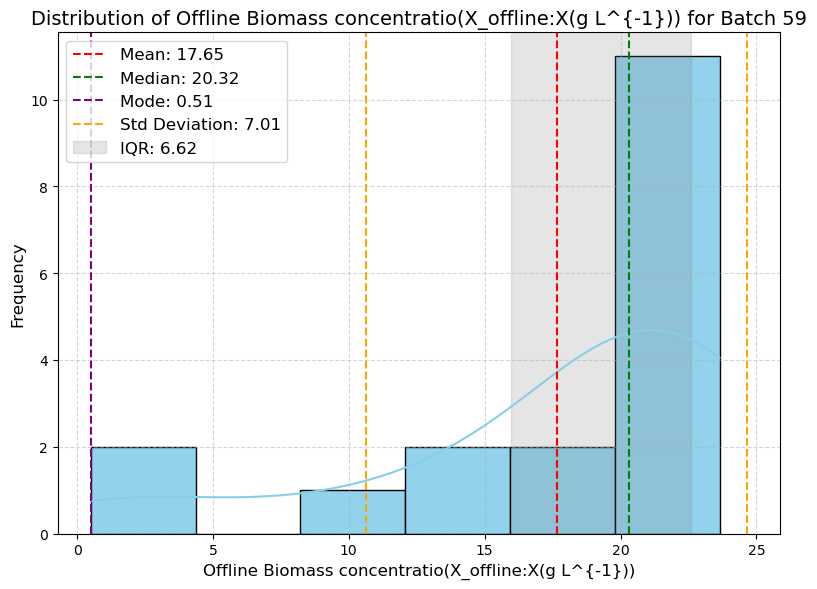

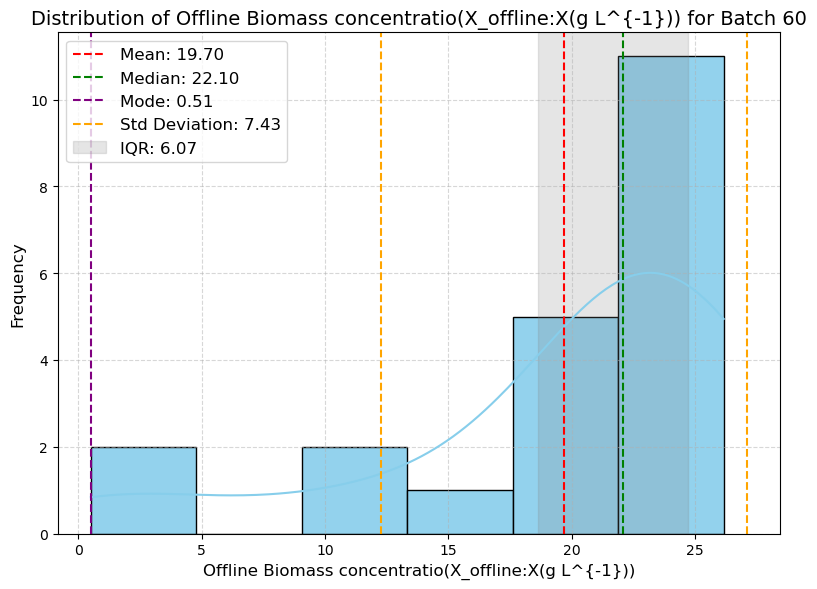

In [3]:
# Plot histogram for each batch
for i in range(31, 61):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=par, kde=True, color='skyblue', alpha=0.9)
    plt.title(f'Distribution of {par} for Batch {i}', fontsize=14)
    plt.xlabel(par, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Annotate mean, median, and mode values on the histogram
    plt.axvline(df[par].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {df[par].mean():.2f}')
    plt.axvline(df[par].median(), color='green', linestyle='--', linewidth=1.5, label=f'Median: {df[par].median():.2f}')
    mode_value = df[par].mode().iloc[0] if not df[par].mode().empty else None
    if mode_value:
        plt.axvline(mode_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_value:.2f}')

    # Add one standard deviation below and above the mean
    std_dev = df[par].std()
    plt.axvline(df[par].mean() - std_dev, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_dev:.2f}')
    plt.axvline(df[par].mean() + std_dev, color='orange', linestyle='--', linewidth=1.5)

    # Calculate interquartile range (IQR) and add shaded region
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1
    plt.axvspan(Q1, Q3, color='gray', alpha=0.2, label=f'IQR: {IQR:.2f}')

    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


## Combined Statistical Analysis and Distribution Plotting: Aggregated Batch Data
### Batches 31-60: Controlled by recipe driven approach

In [3]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Initialize an empty list to store the parameter values from all batches
combined_parameter_values = []

# Iterate over batch numbers
for i in range(31, 61):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)
    # Extract the values of the parameter of interest
    parameter_values = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].tolist()
    
    # Extend the list with the parameter values from the current batch
    combined_parameter_values.extend(parameter_values)

# Create a DataFrame with the combined parameter values
combined_df = pd.DataFrame({par: combined_parameter_values})

# Calculate MEAN, MEDIAN, STD, MIN, MAX values of the combined parameter values
mean_combined = combined_df[par].mean()
median_combined = combined_df[par].median()
std_combined = combined_df[par].std()
min_combined = combined_df[par].min()
max_combined = combined_df[par].max()
mode_combined = combined_df[par].mode()
mode_combined_value = mode_combined.iloc[0] if not mode_combined.empty else None
Q1_combined = combined_df[par].quantile(0.25)
Q3_combined = combined_df[par].quantile(0.75)
IQR_combined = Q3_combined - Q1_combined

# Create a DataFrame with the statistical values of the combined parameter values
stats_combined = pd.DataFrame({
    'Statistic (Agg Batched)': ['Mean', 'Median', 'Mode', 'Std', 'Min', 'Max', 'Q1', 'Q3', 'IQR'],
    'Value (Agg Batched)': [mean_combined, median_combined, mode_combined_value, std_combined, min_combined, max_combined, Q1_combined, Q3_combined, IQR_combined]
})

# Display the summary DataFrame 
# stats_combined: statistic values for the analyzing parameter for all the batches (1 to 30).
# combined_df: values of the analyzing parameter for all the batches in one column.
# print(stats_combined)
# # print(combined_df)
stats_combined

,Statistic (Agg Batched),Value (Agg Batched)
0,Mean,18.894796
1,Median,21.275500
2,Mode,20.913000
3,Std,7.045290
4,Min,0.402170
5,Max,27.882000
6,Q1,16.958750
7,Q3,23.860500
8,IQR,6.901750


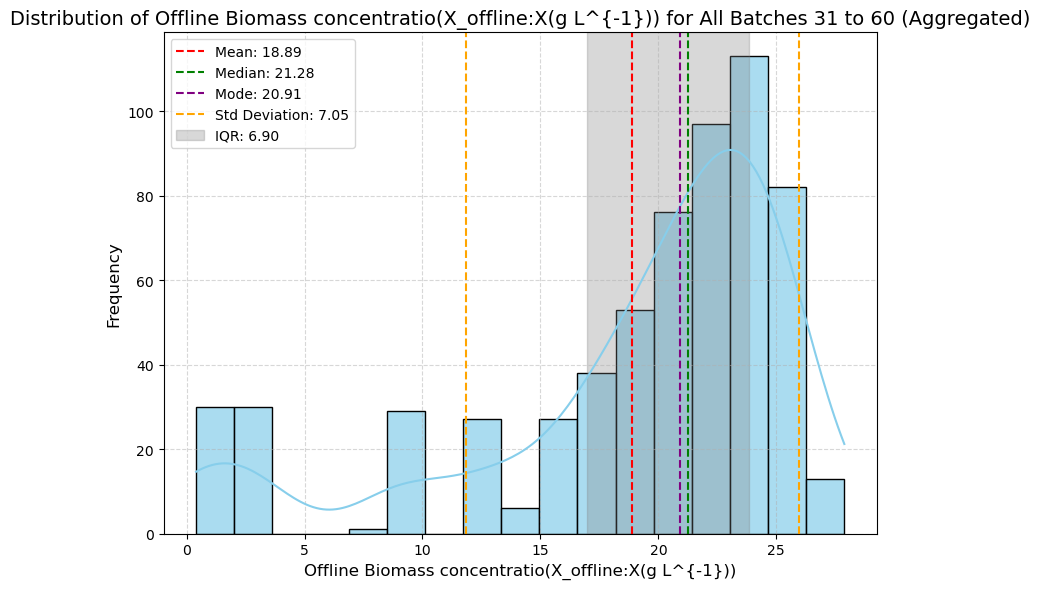

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate interquartile range (IQR)
Q1 = combined_df[par].quantile(0.25)
Q3 = combined_df[par].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x=par, kde=True, color='skyblue', alpha=0.7)
plt.title(f'Distribution of {par} for All Batches 31 to 60 (Aggregated)', fontsize=14)
plt.xlabel(par, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate mean, median, and mode values on the histogram
plt.axvline(mean_combined, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_combined:.2f}')
plt.axvline(median_combined, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_combined:.2f}')
plt.axvline(mode_combined_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_combined_value:.2f}')
# Add one standard deviation below and above the mean
plt.axvline(mean_combined - std_combined, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_combined:.2f}')
plt.axvline(mean_combined + std_combined, color='orange', linestyle='--', linewidth=1.5)
# Calculate interquartile range (IQR) and add shaded region
plt.axvspan(Q1, Q3, color='gray', alpha=0.3, label=f'IQR: {IQR:.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Static Plotting for Variabilities between Batches (Comparisons)

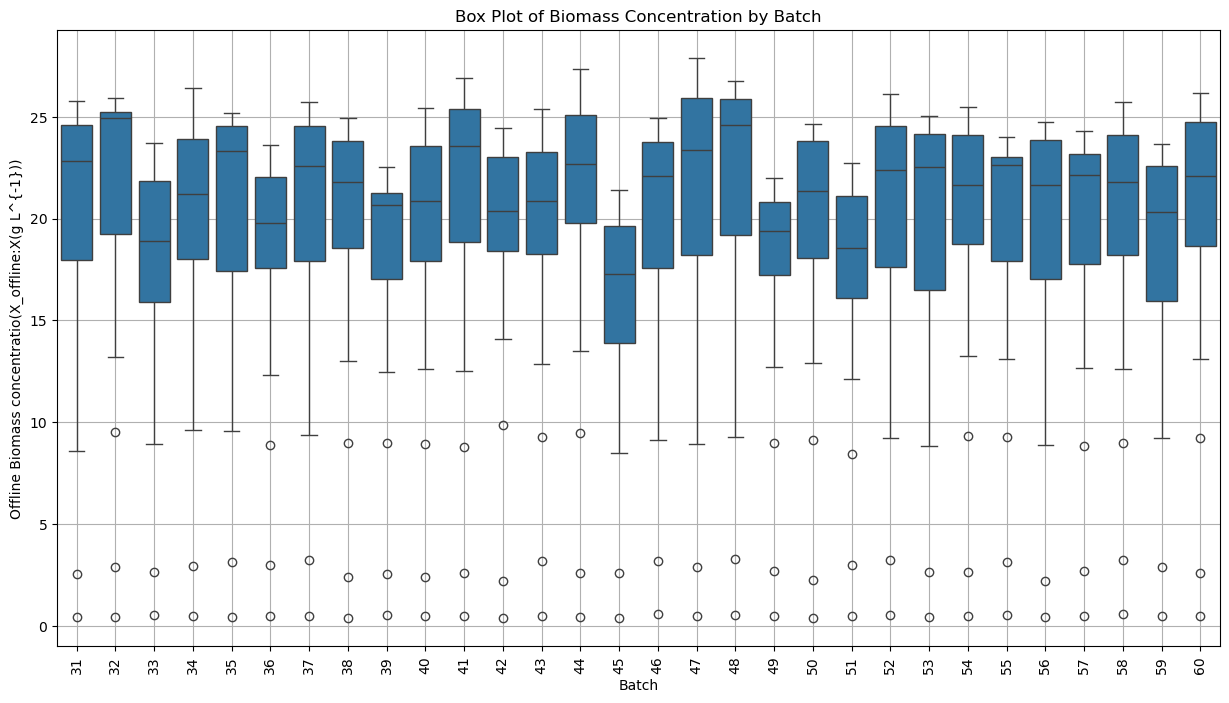

In [8]:
# Combine all batch data for box plot visualization
all_batches = []
for i in range(31, 61):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = i
    df.dropna(subset=['Offline Biomass concentratio(X_offline:X(g L^{-1}))'], inplace=True)
    all_batches.append(df)

all_combined_df = pd.concat(all_batches, ignore_index=True)
# all_combined_df: all the batches in one table!
# Plot box plots for each batch
plt.figure(figsize=(15, 8))
sns.boxplot(x='Batch', y=par, data=all_combined_df)
plt.title('Box Plot of Biomass Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


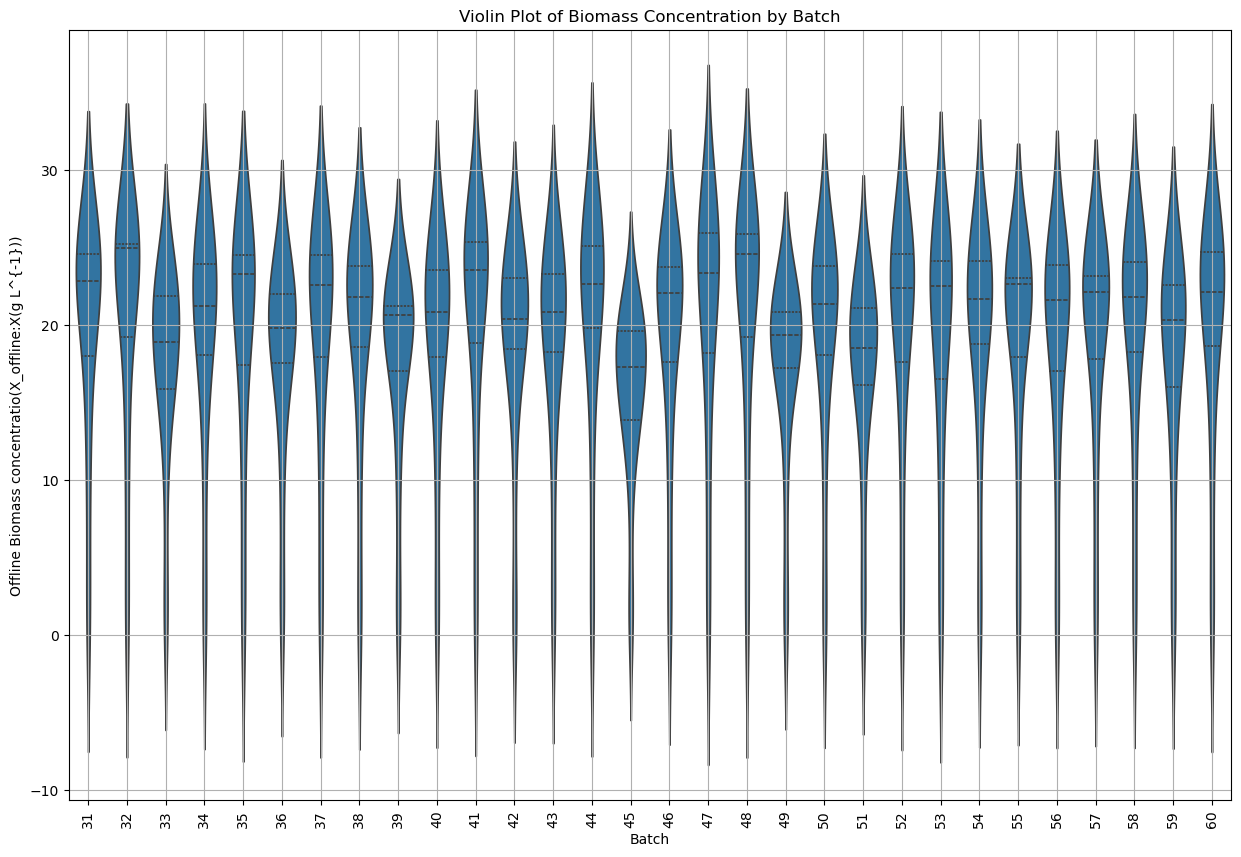

In [9]:
# Plot violin plots for each batch
plt.figure(figsize=(15, 10))
sns.violinplot(x='Batch', y=par, data=all_combined_df, inner='quartile')
plt.title('Violin Plot of Biomass Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Criterion Setup for all the batches - Percentile

### **Criteria Selection Summary**


Additionally, percentiles were calculated to establish criteria for categorizing the performance of the batches:

10th Percentile
25th Percentile (Q1)
50th Percentile (Median)
75th Percentile (Q3)
90th Percentile

### **Criteria for Evaluation**

The Biomass concentration values were categorized into five performance levels based on the calculated percentiles:

- **Optimal:** Values above the 90th percentile.
- **Above Average:** Values between the 75th and 90th percentiles.
- **Average:** Values between the 25th and 75th percentiles.
- **Below Average:** Values between the 10th and 25th percentiles.
- **Non-optimal:** Values below the 10th percentile.


***Rationale for Criteria***

The choice of these criteria is based on the need to objectively categorize batch performance using statistical measures:

Percentile-Based Categorization: Percentiles are robust statistical measures that help in understanding the distribution of data. They allow us to classify the data into meaningful performance levels without being affected by outliers.
Focus on High Performance: The criteria emphasize identifying the top-performing batches (Optimal and Above Average) by focusing on the higher percentiles. This approach helps in recognizing the batches that achieve the highest Biomass concentration, which is crucial for optimizing production.
Balanced Evaluation: By including categories for Average, Below Average, and Non-optimal performance, the criteria ensure a comprehensive evaluation. This helps in identifying areas of improvement and understanding the distribution of performance across all batches.
Summary of Percentiles

10th Percentile: The concentration value below which 10% of the data falls.
25th Percentile (Q1): The concentration value below which 25% of the data falls.
50th Percentile (Median): The middle concentration value.
75th Percentile (Q3): The concentration value below which 75% of the data falls.
90th Percentile: The concentration value below which 90% of the data falls.
By implementing these criteria, we can systematically evaluate and compare the performance of different batches, leading to data-driven decisions for process optimization.

In [4]:
import pandas as pd
import numpy as np
import os

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Initialize a list to store parameter values for all batches
combined_parameter_values = []

# Read all batches and collect the parameter values
all_batches = []
for i in range(31, 61):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    
    combined_parameter_values.extend(df[par].tolist())
    df['Batch ID'] = i
    all_batches.append(df)

# Combine all batches into a single DataFrame
combined_df = pd.concat(all_batches, ignore_index=True)

# Calculate percentiles
percentiles = np.percentile(combined_parameter_values, [10, 25, 50, 75, 90])
p10, p25, p50, p75, p90 = percentiles

# Define the criteria based on percentiles
def categorize_value(value):
    if value >= p90:
        return 'Optimal'
    elif value >= p75:
        return 'Above Average'
    elif value >= p25:
        return 'Average'
    elif value >= p10:
        return 'Below Average'
    else:
        return 'Non-optimal'

# Apply criteria to the combined data
combined_df['Criteria'] = combined_df[par].apply(categorize_value)

# Display the summary of percentiles
print("Percentiles:")
print(f"10th Percentile: {p10}")
print(f"25th Percentile (Q1): {p25}")
print(f"50th Percentile (Median): {p50}")
print(f"75th Percentile (Q3): {p75}")
print(f"90th Percentile: {p90}")


Percentiles:
10th Percentile: 8.62093
25th Percentile (Q1): 16.958750000000002
50th Percentile (Median): 21.2755
75th Percentile (Q3): 23.860500000000002
90th Percentile: 25.1633


In [5]:
combined_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,209,208,207,206,205,204,203,202,201,Criteria
0,1.0,30,100,8,0.51495,48.08700,100.010,9.3291,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Non-optimal
1,12.0,42,100,15,0.00000,52.44200,250.690,0.0001,0,0.6,...,496080.0,502280.0,507180.0,510080.0,511100.0,510280.0,508400.0,NaN,NaN,Non-optimal
2,24.0,55,100,150,0.00000,225.00000,491.960,0.0001,0,0.7,...,480370.0,486480.0,491140.0,494020.0,494910.0,493950.0,492400.0,NaN,NaN,Non-optimal
3,36.0,55,100,43,0.00000,70.53100,178.360,0.0001,0,0.9,...,620010.0,626050.0,630630.0,633380.0,634250.0,633600.0,631660.0,NaN,NaN,Below Average
4,48.0,60,100,57,0.00000,98.72100,150.170,0.0001,0,1.1,...,752100.0,758820.0,764240.0,767660.0,768930.0,768660.0,767040.0,NaN,NaN,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,192.0,75,100,60,3.62980,0.00000,39.299,6.2344,150,0.9,...,2013500.0,2021000.0,2027300.0,2031600.0,2034000.0,2034900.0,2034800.0,NaN,NaN,Above Average
618,204.0,65,100,60,0.00000,5.12770,29.800,5.7638,250,0.9,...,1943200.0,1950800.0,1957200.0,1961700.0,1964200.0,1964800.0,1964900.0,NaN,NaN,Average
619,216.0,65,100,60,0.00000,0.41666,10.044,101.3200,250,0.9,...,1825500.0,1833000.0,1839100.0,1843400.0,1845800.0,1846400.0,1845800.0,NaN,NaN,Average
620,228.0,65,100,45,0.00000,3.38180,54.075,7.7006,250,0.9,...,1698500.0,1706000.0,1712000.0,1716300.0,1718600.0,1719300.0,1719300.0,NaN,NaN,Average


# Criteria Weight Distribution for Batch Evaluation
## Non-Interactive Batch Evaluation Summary

In [6]:
# Evaluate each batch and store the summary
batch_summaries = []

for i in range(31, 61):
    batch_df = combined_df[combined_df['Batch ID'] == i]
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    summary['Batch'] = i  # Add batch identifier
    
    batch_summaries.append(summary)

# Convert batch summaries to DataFrame
batch_performance = pd.DataFrame(batch_summaries).fillna(0)
batch_performance = batch_performance[['Batch', 'Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']]

# Display the summary DataFrame
print("\nBatch Performance Summary:")
print(batch_performance)


Batch Performance Summary:
    Batch    Optimal  Above Average    Average  Below Average  Non-optimal
0      31  13.636364      27.272727  36.363636       9.090909    13.636364
1      32  38.095238      19.047619  19.047619      14.285714     9.523810
2      33   0.000000       0.000000  65.217391      26.086957     8.695652
3      34  14.285714      14.285714  47.619048      14.285714     9.523810
4      35   5.555556      38.888889  33.333333      11.111111    11.111111
5      36   0.000000       0.000000  76.190476      14.285714     9.523810
6      37  15.789474      21.052632  42.105263      10.526316    10.526316
7      38   0.000000      23.809524  52.380952      14.285714     9.523810
8      39   0.000000       0.000000  76.190476      14.285714     9.523810
9      40   9.523810      14.285714  52.380952      14.285714     9.523810
10     41  27.272727      22.727273  27.272727      13.636364     9.090909
11     42   0.000000      19.047619  61.904762       9.523810     9.5238

In [7]:
batch_performance

,Batch,Optimal,Above Average,Average,Below Average,Non-optimal
0,31,13.636364,27.272727,36.363636,9.090909,13.636364
1,32,38.095238,19.047619,19.047619,14.285714,9.523810
2,33,0.000000,0.000000,65.217391,26.086957,8.695652
3,34,14.285714,14.285714,47.619048,14.285714,9.523810
4,35,5.555556,38.888889,33.333333,11.111111,11.111111
5,36,0.000000,0.000000,76.190476,14.285714,9.523810
6,37,15.789474,21.052632,42.105263,10.526316,10.526316
7,38,0.000000,23.809524,52.380952,14.285714,9.523810
8,39,0.000000,0.000000,76.190476,14.285714,9.523810
9,40,9.523810,14.285714,52.380952,14.285714,9.523810


# Interactive Batch Evaluation Summary

In [14]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Evaluate each batch and store the summary
batch_summaries = {}

for i in range(31, 61):
    batch_df = combined_df[combined_df['Batch ID'] == i].copy()
    
    # Apply the criteria to the batch data
    batch_df.loc[:, 'Criteria'] = batch_df[par].apply(categorize_value)
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    
    batch_summaries[i] = summary

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Evaluation Summaries", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.H2("Evaluation Summary", style={'textAlign': 'center'}),
    html.Table(id='summary-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(31, 61)]
    return []

@app.callback(
    Output('summary-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_summary_table(selected_batches):
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(category, style={'border': '1px solid #ffffff', 'padding': '8px'}) for category in ['Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']])]
    
    rows = []
    for batch_id in selected_batches:
        summary = batch_summaries.get(batch_id, {})
        row = [html.Td(batch_id, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for category in ['Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal']:
            row.append(html.Td(f"{summary.get(category, 0):.2f}%", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# **Allocating Final Score to The Each Batch**

In [8]:
# Assign weights to categories
weights = {
    'Optimal': 5,
    'Above Average': 4,
    'Average': 3,
    'Below Average': 2,
    'Non-optimal': 1
}

# Calculate scores for each batch
batch_performance['Score'] = (batch_performance['Optimal'] * weights['Optimal'] +
                       batch_performance['Above Average'] * weights['Above Average'] +
                       batch_performance['Average'] * weights['Average'] +
                       batch_performance['Below Average'] * weights['Below Average'] +
                       batch_performance['Non-optimal'] * weights['Non-optimal']) / 100

# Rank batches based on scores
batch_performance['Rank'] = batch_performance['Score'].rank(ascending=False)

# Sort by rank
batch_performance = batch_performance.sort_values(by='Rank')

# Display the summary DataFrame with ranks
# print(batch_performance[['Batch', 'Score', 'Rank']])
batch_performance


,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank
17,48,42.857143,14.285714,19.047619,14.285714,9.523810,3.666667,1.0
1,32,38.095238,19.047619,19.047619,14.285714,9.523810,3.619048,2.0
10,41,27.272727,22.727273,27.272727,13.636364,9.090909,3.454545,3.0
16,47,35.000000,10.000000,30.000000,15.000000,10.000000,3.450000,4.0
13,44,23.809524,19.047619,38.095238,9.523810,9.523810,3.380952,5.0
29,60,19.047619,19.047619,38.095238,14.285714,9.523810,3.238095,6.0
6,37,15.789474,21.052632,42.105263,10.526316,10.526316,3.210526,7.0
21,52,19.047619,14.285714,42.857143,14.285714,9.523810,3.190476,8.0
0,31,13.636364,27.272727,36.363636,9.090909,13.636364,3.181818,9.0
4,35,5.555556,38.888889,33.333333,11.111111,11.111111,3.166667,10.0


### Interactive Batch Performance Ranking

In [16]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output, State, callback_context


# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Performance Ranking", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Top N Batches', id='show-top-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='top-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Bottom N Batches', id='show-bottom-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='bottom-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Dropdown(
        id='sort-selector',
        options=[
            {'label': 'Rank', 'value': 'Rank'},
            {'label': 'Score', 'value': 'Score'},
            {'label': 'Batch', 'value': 'Batch'}
        ],
        value='Rank',
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.H2("Ranking Summary", style={'textAlign': 'center'}),
    html.Table(id='ranking-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks'),
     Input('show-top-button', 'n_clicks'),
     Input('show-bottom-button', 'n_clicks')],
    [State('top-n-input', 'value'),
     State('bottom-n-input', 'value')]
)
def update_batch_selection(show_all_clicks, show_top_clicks, show_bottom_clicks, top_n, bottom_n):
    ctx = callback_context
    if not ctx.triggered:
        return []
    
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    
    if button_id == 'show-all-button':
        return [i for i in range(31, 61)]
    elif button_id == 'show-top-button':
        top_batches = batch_performance.nsmallest(top_n, 'Rank')['Batch'].tolist()
        return top_batches
    elif button_id == 'show-bottom-button':
        bottom_batches = batch_performance.nlargest(bottom_n, 'Rank')['Batch'].tolist()
        return bottom_batches
    return []

@app.callback(
    Output('ranking-table', 'children'),
    [Input('batch-selector', 'value'),
     Input('sort-selector', 'value')]
)
def update_ranking_table(selected_batches, sort_by):
    if not selected_batches:
        return []
    
    # Sort the summary DataFrame based on the selected sort option
    sorted_df = batch_performance[batch_performance['Batch'].isin(selected_batches)].sort_values(by=sort_by)
    
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(column, style={'border': '1px solid #ffffff', 'padding': '8px'}) for column in sorted_df.columns[1:]])]
    
    rows = []
    for _, row_data in sorted_df.iterrows():
        row = [html.Td(row_data['Batch'], style={'border': '1px solid #ffffff', 'padding': '8px'})]
        row.extend([html.Td(f"{row_data[col]:.2f}" if isinstance(row_data[col], float) else row_data[col], style={'border': '1px solid #ffffff', 'padding': '8px'}) for col in sorted_df.columns[1:]])
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# Interactive Visualization for Comparative Analysis (Best and Worst as Starting Plots)

In [18]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
from scipy.stats import gaussian_kde

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    return pd.read_csv(file_path)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
    html.H2("Batch Variability Comparison", style={'textAlign': 'center'}),
    html.Table(id='comparison-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()
    
    for batch in selected_batches:
        df = load_batch_data(batch)
        penicillin_data = df[par].dropna()  # Remove NaN values

        if penicillin_data.empty:
            continue

        # Calculate KDE
        kde = gaussian_kde(penicillin_data)
        x_values = np.linspace(penicillin_data.min(), penicillin_data.max(), 1000)
        kde_values = kde(x_values)
        
        fig.add_trace(go.Histogram(x=penicillin_data, name=f'Batch {batch}', opacity=0.6, histnorm='probability density'))
        fig.add_trace(go.Scatter(x=x_values, y=kde_values, mode='lines', name=f'Batch {batch} (KDE)', line=dict(width=2), showlegend=False))  # Remove KDE from the legend
    
    fig.update_layout(
        barmode='overlay',
        title='Distribution of Biomass Concentration',
        xaxis_title=par,
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    return fig

@app.callback(
    Output('comparison-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_comparison_table(selected_batches):
    headers = html.Tr([html.Th("Metric", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                      [html.Th(f'Batch {batch}', style={'border': '1px solid #ffffff', 'padding': '8px'}) for batch in selected_batches])
    
    rows = []
    metrics = ['Mean', 'Median', 'Standard Deviation', 'IQR']
    
    for metric in metrics:
        row = [html.Td(metric, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for batch in selected_batches:
            df = load_batch_data(batch)
            if metric == 'Mean':
                value = df[par].mean()
            elif metric == 'Median':
                value = df[par].median()
            elif metric == 'Standard Deviation':
                value = df[par].std()
            elif metric == 'IQR':
                value = df[par].quantile(0.75) - df[par].quantile(0.25)
            row.append(html.Td(f"{value:.2f}", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return [headers] + rows

if __name__ == '__main__':
    app.run_server(debug=True)


In [19]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    fig = go.Figure()

    for batch in selected_batches:
        df = load_batch_data(batch)
        penicillin_data = df[par]

        # Check if the data is not empty after dropping NaNs
        if penicillin_data.empty:
            continue

        hist_trace_name = f'Batch {batch}'

        fig.add_trace(go.Histogram(
            x=penicillin_data,
            histnorm='density',
            name=hist_trace_name,
            opacity=0.6
        ))

        median = penicillin_data.median()
        mode = penicillin_data.mode().iloc[0] if not penicillin_data.mode().empty else np.nan
        iqr = penicillin_data.quantile(0.75) - penicillin_data.quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[median],
            y=[0],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Hide legend for scatter trace
        ))

    fig.update_layout(
        title='Density Plot of Biomass Concentration',
        xaxis_title='Biomass concentration(P:g/L)',
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff',
        barmode='overlay'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [20]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Function to calculate metrics for hover info
def calculate_metrics(df):
    metrics = {}
    metrics['Median'] = df[par].median()
    metrics['Mode'] = df[par].mode().iloc[0] if not df[par].mode().empty else np.nan
    metrics['Min'] = df[par].min()
    metrics['Max'] = df[par].max()
    metrics['IQR'] = df[par].quantile(0.75) - df[par].quantile(0.25)
    return metrics

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Box Plot Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='box-plot', style={'height': '60vh'})
])

@app.callback(
    Output('box-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_box_plot(selected_batches):
    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()
    
    for batch in selected_batches:
        df = combined_df[combined_df['Batch'] == batch]
        metrics = calculate_metrics(df)
        
        fig.add_trace(go.Box(
            y=df[par],
            name=f'Batch {batch}',
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8,
            hovertext=[
                f"Median: {metrics['Median']:.2f}<br>"
                f"Mode: {metrics['Mode']:.2f}<br>"
                f"Min: {metrics['Min']:.2f}<br>"
                f"Max: {metrics['Max']:.2f}<br>"
                f"IQR: {metrics['IQR']:.2f}"
                for _ in range(len(df))
            ]
        ))
    
    fig.update_layout(
        title='Box Plot of Biomass Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [21]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'Offline Biomass concentratio(X_offline:X(g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Distribution Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='violin-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('violin-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_violin_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()

    for batch in selected_batches:
        batch_data = combined_df[combined_df['Batch'] == batch]
        
        fig.add_trace(go.Violin(
            x=batch_data['Batch'], 
            y=batch_data[par],
            name=f'Batch {batch}',
            box_visible=True,
            meanline_visible=True
        ))
        
        median = batch_data[par].median()
        mode = batch_data[par].mode().iloc[0] if not batch_data[par].mode().empty else np.nan
        iqr = batch_data[par].quantile(0.75) - batch_data[par].quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[batch], 
            y=[median],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Remove scatter traces from legend
        ))

    fig.update_layout(
        title='Violin Plot of Biomass Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


### Quantifying the varibilities of the best and worst batches

In [9]:
batch_performance

,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank
17,48,42.857143,14.285714,19.047619,14.285714,9.523810,3.666667,1.0
1,32,38.095238,19.047619,19.047619,14.285714,9.523810,3.619048,2.0
10,41,27.272727,22.727273,27.272727,13.636364,9.090909,3.454545,3.0
16,47,35.000000,10.000000,30.000000,15.000000,10.000000,3.450000,4.0
13,44,23.809524,19.047619,38.095238,9.523810,9.523810,3.380952,5.0
29,60,19.047619,19.047619,38.095238,14.285714,9.523810,3.238095,6.0
6,37,15.789474,21.052632,42.105263,10.526316,10.526316,3.210526,7.0
21,52,19.047619,14.285714,42.857143,14.285714,9.523810,3.190476,8.0
0,31,13.636364,27.272727,36.363636,9.090909,13.636364,3.181818,9.0
4,35,5.555556,38.888889,33.333333,11.111111,11.111111,3.166667,10.0


# Confidence Intervals - Bootstrapping Confidence Intervals

In [10]:
import pandas as pd
import numpy as np
import os

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Function to calculate bootstrap confidence intervals
def bootstrap_ci(data, func=np.mean, n_resamples=1000, ci=95):
    """Calculate bootstrap confidence intervals."""
    n_size = len(data)
    stats = []
    for _ in range(n_resamples):
        sample = np.random.choice(data, n_size, replace=True)
        stat = func(sample)
        stats.append(stat)
    lower = np.percentile(stats, (100 - ci) / 2)
    upper = np.percentile(stats, 100 - (100 - ci) / 2)
    return lower, upper

# Add confidence intervals for scores
ci_lower_bounds = []
ci_upper_bounds = []
precisions = []

for i in range(31, 61):
    scores = []
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    batch_df = pd.read_csv(file_path)
    for _ in range(1000):  # Number of bootstrap samples
        resampled_df = batch_df.sample(frac=1, replace=True)
        resampled_df['Criteria'] = resampled_df[par].apply(categorize_value)
        category_counts = resampled_df['Criteria'].value_counts(normalize=True) * 100
        score = (category_counts.get('Optimal', 0) * weights['Optimal'] +
                 category_counts.get('Above Average', 0) * weights['Above Average'] +
                 category_counts.get('Average', 0) * weights['Average'] +
                 category_counts.get('Below Average', 0) * weights['Below Average'] +
                 category_counts.get('Non-optimal', 0) * weights['Non-optimal']) / 100
        scores.append(score)
    lower, upper = bootstrap_ci(scores, np.mean)
    ci_lower_bounds.append(lower)
    ci_upper_bounds.append(upper)
    # precisions.append((upper - lower) / batch_performance.loc[batch_performance['Batch'] == i, 'Score'].values[0] * 100)  # Precision as percentage
    # precisions.append(upper - lower)
    precisions.append(1 / (upper - lower))  # Precision as inverse of CI width

batch_performance['CI Lower'] = ci_lower_bounds
batch_performance['CI Upper'] = ci_upper_bounds
batch_performance['Precision'] = precisions

# Create batch_performance_with_ci variable
batch_performance_with_ci = batch_performance[['Batch', 'Optimal', 'Above Average', 'Average', 'Below Average', 'Non-optimal', 'Score', 'Rank', 'CI Lower', 'CI Upper', 'Precision']]

# Display the batch_performance_with_ci DataFrame
# print(batch_performance_with_ci)

# Optionally, save the batch_performance_with_ci to a CSV file
batch_performance_with_ci.to_csv('Bio_Analysis_31_60.csv', index=False)
batch_performance_with_ci

,Batch,Optimal,Above Average,Average,Below Average,Non-optimal,Score,Rank,CI Lower,CI Upper,Precision
17,48,42.857143,14.285714,19.047619,14.285714,9.523810,3.666667,1.0,1.037862,1.039006,873.973082
1,32,38.095238,19.047619,19.047619,14.285714,9.523810,3.619048,2.0,1.046976,1.048444,681.653157
10,41,27.272727,22.727273,27.272727,13.636364,9.090909,3.454545,3.0,1.027182,1.027962,1281.924859
16,47,35.000000,10.000000,30.000000,15.000000,10.000000,3.450000,4.0,1.037582,1.038742,861.665262
13,44,23.809524,19.047619,38.095238,9.523810,9.523810,3.380952,5.0,1.038795,1.040165,729.573795
29,60,19.047619,19.047619,38.095238,14.285714,9.523810,3.238095,6.0,1.029975,1.030813,1192.884187
6,37,15.789474,21.052632,42.105263,10.526316,10.526316,3.210526,7.0,1.039235,1.040484,800.884787
21,52,19.047619,14.285714,42.857143,14.285714,9.523810,3.190476,8.0,1.034255,1.035313,944.810730
0,31,13.636364,27.272727,36.363636,9.090909,13.636364,3.181818,9.0,1.029189,1.029991,1247.180576
4,35,5.555556,38.888889,33.333333,11.111111,11.111111,3.166667,10.0,1.035975,1.037028,949.471598


In [11]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Load all batches into a single DataFrame
all_batches = []
for i in range(31, 61):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=['Offline Biomass concentratio(X_offline:X(g L^{-1}))'], inplace=True)  # Remove NaN values
    df['Batch ID'] = i
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Biomass Concentration Analysis"),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch, worst_batch],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot'),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()

    for batch in selected_batches:
        batch_df = all_batches_df[all_batches_df['Batch ID'] == batch]
        penicillin_data = batch_df['Offline Biomass concentratio(X_offline:X(g L^{-1}))']

        # Calculate confidence intervals using bootstrapping
        def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95):
            bootstrap_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)
            bootstrap_means = np.mean(bootstrap_samples, axis=1)
            lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
            upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
            return lower_bound, upper_bound

        ci_lower, ci_upper = bootstrap_confidence_interval(penicillin_data)

        # Add density plot
        fig.add_trace(go.Histogram(
            x=penicillin_data,
            histnorm='probability density',
            name=f'Batch {batch}',
            opacity=0.6
        ))

        # Add confidence intervals with annotations
        color = 'blue' if batch == best_batch else 'red'
        fig.add_vline(x=ci_lower, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=ci_lower, y=0.9, yref='paper', text=f'CI Lower Batch {batch}: {ci_lower:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )
        fig.add_vline(x=ci_upper, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=ci_upper, y=0.95, yref='paper', text=f'CI Upper Batch {batch}: {ci_upper:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )

    fig.update_layout(
        title='Density Plot of Biomass Concentration with Confidence Intervals',
        xaxis_title='Offline Biomass concentratio(X_offline:X(g L^{-1}))',
        yaxis_title='Density',
        barmode='overlay',
        legend_title='Batch',
        template='plotly_dark'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Plotting the Batch Performance - Final Results (Donut charts in the Scatter plot)

### Extracting Concentration and time separately 

In [3]:
import os
import pandas as pd

# Directory containing the CSV files
directory = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 31-60 - Controlled by Operators'

# Initialize an empty list to hold the penicillin columns
biomass_columns = []
max_time_col = None
max_non_na_count = 0

# Loop over the 30 CSV files
for i in range(31, 61):
    file_path = os.path.join(directory, f'batch_{i}.csv')
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract the 'Time (h)' and 'Penicillin concentration(P:g/L)' columns
    time_col = df['Time (h)']
    bio_col = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].rename(f'Biomass_{i}')
    
    # Append the penicillin column to the list
    biomass_columns.append(bio_col)
    
    # Check if this time column has more non-NaN values than the current max
    non_na_count = time_col.notna().sum()
    if non_na_count > max_non_na_count:
        max_non_na_count = non_na_count
        max_time_col = time_col.rename('Time')

# Combine the selected time column with all penicillin columns
bio_time_31_60 = pd.concat([max_time_col] + biomass_columns, axis=1)

# Display the final DataFrame (for verification)
bio_time_31_60

# Save the resulting DataFrame to a new CSV file
# output_path = os.path.join('/Users/farid/Documents/Thesis/DATA - Mendeley_data/2- Biomass Concentration Analysis', 'Biomass_vs_time_31_60.csv')
# bio_time_31_60.to_csv(output_path, index=False)

# print(f"Data extracted and saved to {output_path}")


,Time,Biomass_31,Biomass_32,Biomass_33,Biomass_34,Biomass_35,Biomass_36,Biomass_37,Biomass_38,Biomass_39,...,Biomass_51,Biomass_52,Biomass_53,Biomass_54,Biomass_55,Biomass_56,Biomass_57,Biomass_58,Biomass_59,Biomass_60
0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.45789,0.45906,0.52766,0.48441,0.46355,0.48289,0.49568,0.41546,0.52791,...,0.48946,0.53145,0.47294,0.49755,0.57039,0.47221,0.49187,0.58647,0.50704,0.50572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,261.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,261.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,261.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,261.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
